In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

# import statsmodels.api as sm
# from itertools import product

In [2]:
 rename_dict = {'Abdominal pain': 'Abdominal pain',
 'Arthralgia': 'Arthralgia',
 'Chest Pain or discomfort': 'Chest Pain or discomfort',
 'Dizziness': 'Dizziness',
 'Emotoional Disturbance': 'Emotional Disturbance',
 'Sleep disturbance': 'Sleep disturbance',
 'Syncope': 'Syncope',
'Disturbances Of Sensation Of Smell And Taste':'symp_taam_reach',
 'Fever':'symp_fever',
 'Nausea and or vomiting':'symp_bchilot_akahot',
 'Myalgia':'symp_keev_shririm',
 'Fatigue':'symp_ayefut',
 'Headache':'symp_keev_rosh',
 'Diarrhea':'symp_shilshul',
 'Dyspnea and or Shortness of breath':'symp_kotzer_neshima',
 'Runny nose and or nasal congestion':'symp_godesh_nazelet',
 'Sore throat':'symp_keev_garon',
 'Cough':'symp_shiul'}

In [3]:
WIN = 7
MAX_DAYS_BKWD = 31
MAX_DAYS_FWD = 31
MAX_DAYS_BKWD_REC = 51
MAX_DAYS_FWD_REC = 31
MIN_POS_FOR_OR = 5
SZ = 12
colors = sns.color_palette(n_colors=3)
SURV_COLOR = 'purple'
DOC_COLOR = 'green'
SYMP_COLOR = sns.color_palette()[1]
NO_SYMP_COLOR = sns.color_palette()[4]


symp_list = ['symp_taam_reach',
 'symp_fever',
 'symp_bchilot_akahot',
 'symp_keev_shririm',
 'symp_ayefut',
 'symp_keev_rosh',
 'symp_shilshul',
 'symp_kotzer_neshima',
 'symp_godesh_nazelet',
 'symp_keev_garon',
 'symp_shiul']

In [7]:
rename_dict = {'chom_38_40': 'Fever ',
               'symp_fever': 'Fever',
               'symp_ayefut': 'Fatigue',
               'symp_bchilot_akahot': 'Nausea\nor vomiting',
               'symp_bilbul': 'Confusion',
               'symp_godesh_nazelet': 'Runny nose',
               'symp_keev_garon': 'Sore throat',
               'symp_keev_rosh': 'Headache',
               'symp_keev_shririm': 'Muscle pain',
               'symp_kotzer_neshima': 'Shortness\nof breath',
               'symp_other': 'Other symptom',
               'symp_shilshul': 'Diarrhea',
               'symp_shiul_leicha': 'Moist cough',
               'symp_shiul_yavesh': 'Dry cough',
               'symp_taam_reach': 'Loss of taste \n or smell',
               'symp_zmarmoret': 'Chills',
              'count_current_smoker': 'Smoking',
              'count_male': 'Male',
              'symp_shiul': 'Cough',
              'Chest Symptom':'Chest pain \n or discomfort',
              'Palpitations':'Palpitations',
             'RASH':'Rash',
             'SYNCOPE':'Syncope',
              'symp_bilbul_Speech_memory':'Confusion, Speech \nor memory disturbance',
              'HEARTBURN':'Heartburn',
               'ABDOMINAL PAIN':'Abdominal pain',
               'Abnormality Of Gait':'Abnormality of gait',
               'BITTER TASTE':'Bitter taste',
               'DIZZINESS':'Dizziness',
               'General symptoms ( Amnesia Chills Generalized pain Hypothermia)':'General symptoms',
               }

def plot_symp_perc_line(tmp, param, corona_ind, ax, win=7, error_band=True, label='', lw=3, alpha=0.6, color='k'):
    idx = (tmp['corona_ind']==corona_ind) & (tmp['param']==param) & (tmp['win']==win)
    p = tmp.loc[idx,'count_symptom']/tmp.loc[idx,'count_all']
    n = tmp.loc[idx,'count_all']
    x = tmp.loc[idx, 'diff_from_test']
    y = p*100
    ax.plot(x,y, label=label, ls='-', lw=lw, alpha=alpha, color=color)
#     ax.set_ylabel(f'{rename_dict[param]} (%)', size=SZ)
    if error_band:
        z = 1.96
        error = 100*(z)*np.sqrt((p*(1-p))/n)
        ax.fill_between(x, y-error, y+error, alpha=0.07, color=color)
        
def plot_tte(s0_df,s1_df,cph_df, col, ax):
    dummy_start = pd.Series(data=[0],index=[-0.01])
    y = s1_df[col]*100
    y = pd.concat([dummy_start, y])
    x = y.index
    ax.plot(x,y, color=SYMP_COLOR, lw=4, alpha=0.65, label='Symptom')
    y = s0_df[col]*100
    y = pd.concat([dummy_start, y])
    x = y.index
    ax.plot(x,y, color=NO_SYMP_COLOR, lw=4, alpha=0.65, label='No symptom')
    
    hr = cph_df.loc[col, 'exp(coef)']
    ax.text(x=0.05,y=0.8,s=f'HR={hr:.1f}',transform=ax.transAxes)
    
    ax.set_xticks([0,5,10,15,20])
#     ax.set_title(rename_dict[col])
#     ax.set_xlabel('days survey to positive test')
#     ax.set_ylabel(f'% tested positive\n{rename_dict[col]}')
    
    max_y =np.ceil(np.max([s0_df[col]*100, s1_df[col]*100]))
    ax.set_yticks(np.linspace(0,max_y, 3))

# Load data

In [8]:
df_surv = pd.read_csv('fig1_df_surv.csv', index_col=0)
df_doc = pd.read_csv('fig1_df_doc.csv', index_col=0)
df_surv_rec = pd.read_csv('fig1_df_surv_rec.csv', index_col=0)
df_doc_rec = pd.read_csv('fig1_df_doc_rec.csv', index_col=0)

s0_df_surv = pd.read_csv('time_to_outcome_quest_km_s0_df.csv', index_col=0)
s1_df_surv = pd.read_csv('time_to_outcome_quest_km_s1_df.csv', index_col=0)
cph_df_surv = pd.read_csv('time_to_outcome_quest_cox_df.csv', index_col=0)

s0_df_doc = pd.read_csv('time_to_outcome_doc_km_s0_df.csv', index_col=0)
s1_df_doc = pd.read_csv('time_to_outcome_doc_km_s1_df.csv', index_col=0)
cph_df_doc = pd.read_csv('time_to_outcome_doc_cox_df.csv', index_col=0)

# Plot

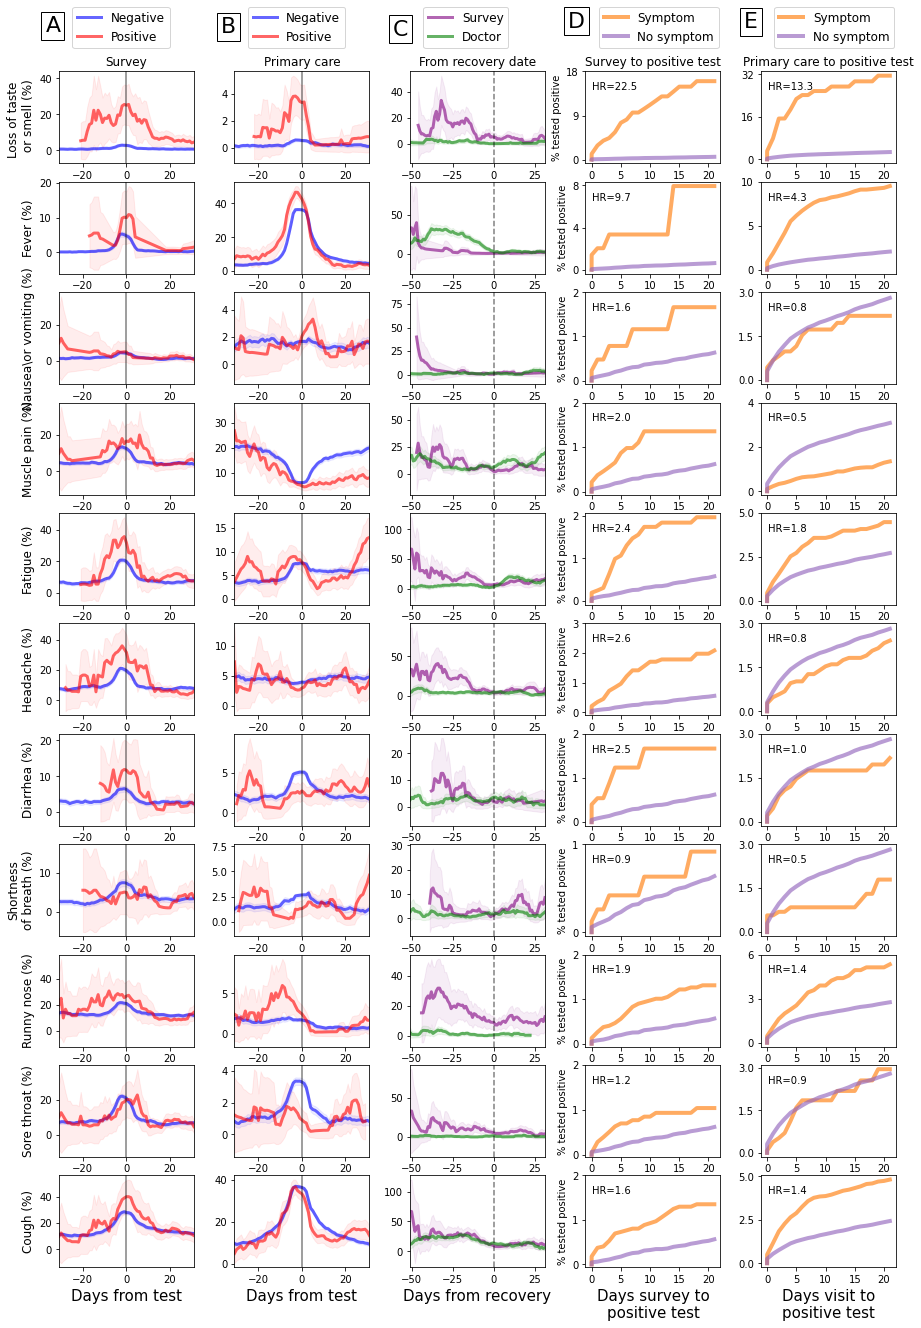

In [9]:
y_max=55

# fig,axes = plt.subplots(11,3,figsize=(14,22))

fig,axes = plt.subplots(11,5,figsize=(15,22))

for i, param in enumerate(symp_list):
    
    # SURVEY
    ax = axes[i,0]
    plot_symp_perc_line(df_surv, param, corona_ind=0, ax=ax, win=WIN, error_band=True, label='Negative', lw=3, alpha=0.6, color='b')
    plot_symp_perc_line(df_surv, param, corona_ind=1, ax=ax, win=WIN, error_band=True, label='Positive', lw=3, alpha=0.6, color='r')
    ax.set_ylabel(f'{rename_dict[param]} (%)', size=SZ)
#     ax.set_xlabel('Days from test', size=SZ)
    ax.set_xlim(-MAX_DAYS_BKWD, MAX_DAYS_FWD)
    ax.axvline(x=0, ls='-', color='k', alpha=0.5)
    
    # DOCTOR
    ax = axes[i,1]
    plot_symp_perc_line(df_doc, param, corona_ind=0, ax=ax, win=WIN, error_band=True, label='Negative', lw=3, alpha=0.6, color='b')
    plot_symp_perc_line(df_doc, param, corona_ind=1, ax=ax, win=WIN, error_band=True, label='Positive', lw=3, alpha=0.6, color='r')
#     ax.set_xlabel('Days from test', size=SZ)
    ax.set_xlim(-MAX_DAYS_BKWD, MAX_DAYS_FWD)
    ax.axvline(x=0, ls='-', color='k', alpha=0.5)
    
    # RECOVERY
    ax = axes[i,2]
    plot_symp_perc_line(df_surv_rec, param, corona_ind=1, ax=ax, win=WIN, error_band=True, label='Survey', lw=3, alpha=0.6, color=SURV_COLOR)
    plot_symp_perc_line(df_doc_rec, param, corona_ind=1, ax=ax, win=WIN, error_band=True, label='Doctor', lw=3, alpha=0.6, color=DOC_COLOR)
#     ax.set_xlabel('Days from recovery', size=SZ)
    ax.set_xlim(-MAX_DAYS_BKWD_REC, MAX_DAYS_FWD_REC)
    ax.axvline(x=0, ls='--', color='k', alpha=0.5)
    
    # Time-to-event Survey
    ax = axes[i,3]
    plot_tte(s0_df_surv,s1_df_surv,cph_df_surv, param, ax)
#     ax.set_ylabel(f'% tested positive\n{rename_dict[param]}')
    ax.set_ylabel('% tested positive')
    
    # Time-to-event Doctor
    ax = axes[i,4]
    plot_tte(s0_df_doc,s1_df_doc,cph_df_doc, param, ax)

    
axes[-1,0].set_xlabel('Days from test', size=SZ+3)
axes[-1,1].set_xlabel('Days from test', size=SZ+3)
axes[-1,2].set_xlabel('Days from recovery', size=SZ+3)
axes[-1,3].set_xlabel('Days survey to\npositive test', size=SZ+3)
axes[-1,4].set_xlabel('Days visit to\npositive test', size=SZ+3)

axes[0,3].set_yticks([0,9,18])
axes[5,3].set_yticks([0,1,2,3])
axes[7,3].set_yticks([0,1])

xt,yt = 1.2,1.5
xl,yl = 0.1,1.25
ax = axes[0,0]    
ax.set_title('Survey', size=SZ)
ax.text(ax.get_xlim()[0]*xt,ax.get_ylim()[1]*yt, 'A', bbox=dict(facecolor='none', edgecolor='k'), fontsize=SZ+10)
ax.legend(fontsize='large', loc=(xl,yl))
ax = axes[0,1]
ax.set_title('Primary care', size=SZ)
ax.text(ax.get_xlim()[0]*xt,ax.get_ylim()[1]*yt, 'B', bbox=dict(facecolor='none', edgecolor='k'), fontsize=SZ+10)
ax.legend(fontsize='large', loc=(xl,yl))
ax = axes[0,2]
ax.set_title('From recovery date', size=SZ)
ax.text(ax.get_xlim()[0]*xt,ax.get_ylim()[1]*yt, 'C', bbox=dict(facecolor='none', edgecolor='k'), fontsize=SZ+10)
ax.legend(fontsize='large', loc=(xl,yl))

xt,yt = -4,1.5
xl,yl = 0.1,1.25
ax = axes[0,3]
ax.set_title('Survey to positive test', size=SZ)
ax.text(xt,ax.get_ylim()[1]*yt, 'D', bbox=dict(facecolor='none', edgecolor='k'), fontsize=SZ+10)
ax.legend(fontsize='large', loc=(xl,yl))
ax = axes[0,4]
ax.set_title('Primary care to positive test', size=SZ)
ax.text(xt,ax.get_ylim()[1]*yt, 'E', bbox=dict(facecolor='none', edgecolor='k'), fontsize=SZ+10)
ax.legend(fontsize='large', loc=(xl,yl))


# fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.2)
fig.savefig('FIG1_new.jpg', dpi=120)